In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#For split the data to train because the number of male and female are not equal.
from sklearn.model_selection import train_test_split

In [3]:
#Read File
df = pd.read_csv("Content.csv")
df.head()

,Entertainment Content,Gaming Content,Food Review Content,Travel Content,Home Decoration Content,TV Program content,Drama Content,Politic Content,Gender
0,1,2,2,0,0,0,0,3,Male
1,0,0,2,3,3,0,-1,1,Female
2,3,3,3,3,3,2,-1,3,Male
3,-3,3,0,1,0,-1,-3,2,Male
4,0,-1,0,1,1,-1,-1,0,Female


In [4]:
#All number of data.
num = df["Gender"].count()
num

62

In [5]:
#Separate by male
df_Male = df.loc[df["Gender"]=="Male"]
df_Male.head()

,Entertainment Content,Gaming Content,Food Review Content,Travel Content,Home Decoration Content,TV Program content,Drama Content,Politic Content,Gender
0,1,2,2,0,0,0,0,3,Male
2,3,3,3,3,3,2,-1,3,Male
3,-3,3,0,1,0,-1,-3,2,Male
5,3,3,3,3,3,3,3,3,Male
7,0,-1,0,2,2,0,-1,2,Male


In [6]:
#Number of male.
num_Male = df_Male["Gender"].count()
num_Male

34

In [7]:
#Separate by female
df_Female = df.loc[df["Gender"]=="Female"]
df_Female.head()

,Entertainment Content,Gaming Content,Food Review Content,Travel Content,Home Decoration Content,TV Program content,Drama Content,Politic Content,Gender
1,0,0,2,3,3,0,-1,1,Female
4,0,-1,0,1,1,-1,-1,0,Female
6,2,-2,2,3,1,1,2,2,Female
11,3,-1,1,3,3,0,0,1,Female
12,3,2,3,3,3,3,2,1,Female


In [8]:
#Number of female.

num_Female = df_Female["Gender"].count()
num_Female

28

In [9]:
#Calculate ratio of each gender. Need 20 sample to test.

print(f"Male = {round(20/num_Male, 3)}")
print(f"Female = {round(20/num_Female, 3)}")

Male = 0.588
Female = 0.714


In [10]:
train_Male, test_Male = train_test_split(df_Male, train_size=0.6)

In [11]:
print(f"Train = {len(train_Male)}")
print(f"Test = {len(test_Male)}")

Train = 20
Test = 14


In [12]:
train_Female, test_Female = train_test_split(df_Female, train_size=0.72)

In [13]:
print(f"Train = {len(train_Female)}")
print(f"Test = {len(test_Female)}")

Train = 20
Test = 8


In [14]:
#Set all labels to columns.

labels = df.columns.tolist()
labels.remove("Gender")
labels

['Entertainment Content',
 'Gaming Content',
 'Food Review Content',
 'Travel Content',
 'Home Decoration Content',
 'TV Program content',
 'Drama Content',
 'Politic Content']

In [15]:
#Find mean score for each gender for analysis.

df_mean_Male = round(train_Male.mean())
df_mean_Female = round(train_Female.mean())

print(f"Male_mean_score = {df_mean_Male.tolist()}")
print(f"Female_mean_score = {df_mean_Female.tolist()}")

Male_mean_score = [0.0, 1.0, 0.0, 1.0, 1.0, -1.0, -1.0, 1.0]
Female_mean_score = [1.0, -0.0, 1.0, 2.0, 1.0, -0.0, -0.0, -0.0]


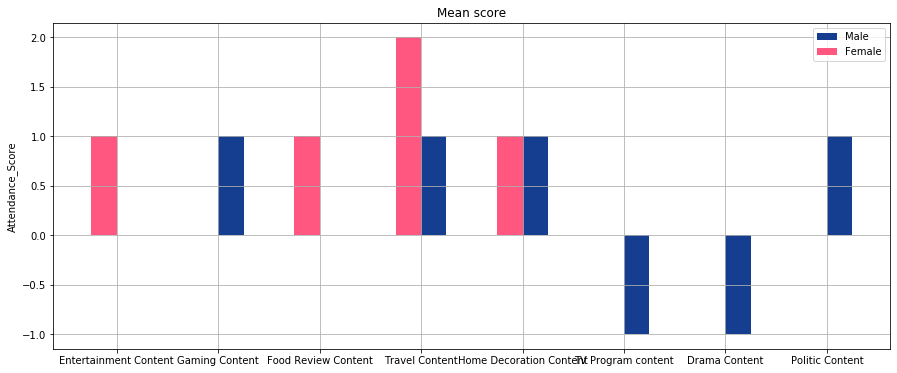

In [16]:
#Data visualization

width = 0.25
fig, ax = plt.subplots(figsize=(15,6))

ax.bar(labels, df_mean_Male, width, label='Male', color="#153e90", align="edge")
ax.bar(labels, df_mean_Female, -width, label='Female', color="#ff577f", align="edge")

ax.set_ylabel("Attendance_Score")
ax.set_title("Mean score")
ax.legend()
ax.grid()

plt.show()

# Decision Tree

In [17]:
#set 1 == Male
#set 2 == Female

df["Gender"].replace("Male", 1, inplace=True)
df["Gender"].replace("Female", 2, inplace=True)

In [18]:
df.head()

,Entertainment Content,Gaming Content,Food Review Content,Travel Content,Home Decoration Content,TV Program content,Drama Content,Politic Content,Gender
0,1,2,2,0,0,0,0,3,1
1,0,0,2,3,3,0,-1,1,2
2,3,3,3,3,3,2,-1,3,1
3,-3,3,0,1,0,-1,-3,2,1
4,0,-1,0,1,1,-1,-1,0,2


In [19]:
#Set relation
X = df[labels]
Y = df["Gender"]

In [20]:
#Split Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [21]:
len(X_test)

19

In [22]:
len(Y_test)

19

In [23]:
from sklearn import tree

In [24]:
#Used DecisionTree Model
model = tree.DecisionTreeClassifier()

In [25]:
#Fit data with model
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
#R squre
model.score(X_test, Y_test)

0.631578947368421

In [27]:
#Predict value from X_test.
y_hat = model.predict(X_test)
y_hat

array([2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1],
      dtype=int64)

In [28]:
test_model = pd.concat([X_test, Y_test], axis=1)
test_model.head()

,Entertainment Content,Gaming Content,Food Review Content,Travel Content,Home Decoration Content,TV Program content,Drama Content,Politic Content,Gender
24,2,0,2,2,0,0,0,0,2
14,-2,-2,1,2,0,-3,-3,0,1
15,2,-1,3,3,1,1,1,1,2
50,1,0,2,2,1,0,0,0,2
8,3,3,3,2,0,0,0,2,1


In [29]:
#Show result true vs. predict.
data_test = pd.concat([test_model.reset_index(), pd.Series(y_hat, name="Predict")], axis=1)
data_test.head()

,index,Entertainment Content,Gaming Content,Food Review Content,Travel Content,Home Decoration Content,TV Program content,Drama Content,Politic Content,Gender,Predict
0,24,2,0,2,2,0,0,0,0,2,2
1,14,-2,-2,1,2,0,-3,-3,0,1,1
2,15,2,-1,3,3,1,1,1,1,2,1
3,50,1,0,2,2,1,0,0,0,2,2
4,8,3,3,3,2,0,0,0,2,1,1
